# Does it help to use local translation? Or is the test broken?
A spainard translated a document for all spanish speakers (e.g., Mexican, Colombian, etc) to use. Company XYZ then saw that spainards converted at a higher rate than other users. Company XYZ thought this conversion derived from their local translation, so they tried local translations for each spanish speaking country. But these local translations seem to decrease conversion. Is this result real or did they mess something up?
* **Is the test in fact negative?** ("it appears that the old version of the site with just one translation across Spain and LatAm performs better")
* **Why might this be the case?**
* **If I identify what's wrong:** generate algorithm to return FALSE if same problem happens in future and TRUE if results can be trusted



In [1]:
import numpy as np
import pandas as pd


In [2]:
test_table = pd.read_csv('Translation_Test/test_table.csv')
print(test_table.shape)
print(test_table.columns)

(453321, 9)
Index(['user_id', 'date', 'source', 'device', 'browser_language',
       'ads_channel', 'browser', 'conversion', 'test'],
      dtype='object')


In [3]:
user_table = pd.read_csv('Translation_Test/user_table.csv')
print(user_table.shape)
print (user_table.columns)

(452867, 4)
Index(['user_id', 'sex', 'age', 'country'], dtype='object')


In [4]:
print (test_table.head(2))
print (test_table.dtypes)
print (user_table.head(2))
print (user_table.dtypes)

   user_id        date  source device browser_language ads_channel browser  \
0   315281  2015-12-03  Direct    Web               ES         NaN      IE   
1   497851  2015-12-04     Ads    Web               ES      Google      IE   

   conversion  test  
0           1     0  
1           0     1  
user_id              int64
date                object
source              object
device              object
browser_language    object
ads_channel         object
browser             object
conversion           int64
test                 int64
dtype: object
   user_id sex  age    country
0   765821   M   20     Mexico
1   343561   F   27  Nicaragua
user_id     int64
sex        object
age         int64
country    object
dtype: object


In [5]:
test_table[test_table['conversion'].isnull() == True]

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test


### What are the proportions of user conversion after test?

Ads should function independent of the site itself. Our interest concerns whether site translation made a difference, so leave out users who came to the site via "Ads" (i.e., keep "SEO" and "Direct"). 

In [6]:
test_table[test_table['source'] != "Ads"]

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1
6,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0
7,527287,2015-12-03,Direct,Web,EN,NaN,Chrome,0,0
8,261625,2015-12-04,Direct,Mobile,ES,NaN,Android_App,0,1
11,73335,2015-12-03,SEO,Web,ES,NaN,IE,0,1
12,744811,2015-12-01,SEO,Mobile,ES,NaN,Android_App,1,0
13,234023,2015-12-03,SEO,Web,ES,NaN,Chrome,0,0
15,103879,2015-11-30,Direct,Mobile,ES,NaN,Iphone_App,0,0
16,409295,2015-12-02,Direct,Web,ES,NaN,FireFox,0,1


In [7]:
test_table_noads = test_table[test_table['source'] != "Ads"]

In [8]:
user_table[user_table.user_id == test_table_noads.user_id.iloc[0]]

,user_id,sex,age,country
19877,315281,M,32,Spain


In [9]:
test_table_noads.head(2)

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1


#### Merge the tables with the additional variables, so I can analyze them

In [10]:
test_table_noads_merged = test_table_noads.merge(user_table, on='user_id', how='left')
test_table_noads_merged.head(3)

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,22.0,Venezuela
2,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0,M,35.0,Mexico


## Plot number of users by country and whether they are test or control

#### (Then break those up into conversion or not)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

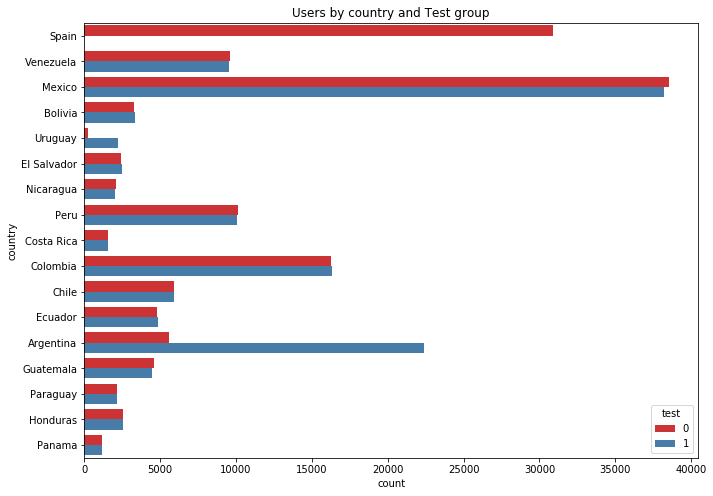

In [12]:
plt.figure()
plt.figure(figsize=(11, 8), facecolor='w', edgecolor='k')
sns.countplot(y='country', hue='test', data=test_table_noads_merged, palette='Set1')
plt.title('Users by country and Test group')
plt.show()

### Interesting things about above plot
* Big disparity in group size for each Uruguay and Argentina 
* Far more users in Mexico than other countries (just reflects population disparity) 

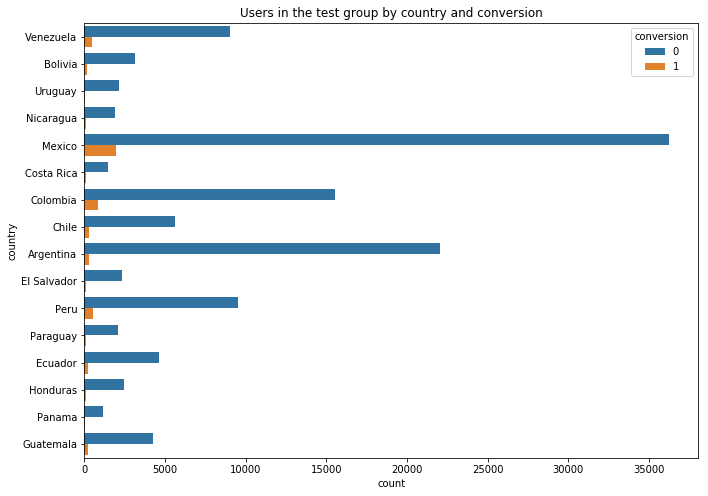

In [13]:
plt.figure()
plt.figure(figsize=(11, 8), facecolor='w', edgecolor='k')
sns.countplot(y='country', hue='conversion', data=test_table_noads_merged[test_table_noads_merged['test'] == 1])
plt.title('Users in the test group by country and conversion')
plt.show()

Above plot suggests that within this test group there is much more "not conversion" than conversion

## Use fisher's exact test to assess significance in 2 x 2 
(Converted x not converted, test x control)

### First, check whether the control group shows significant difference:

In [14]:
from scipy import stats

In [15]:
n_control_notconv = test_table_noads_merged[(test_table_noads_merged['country'] != "Spain") & (test_table_noads_merged['test'] == 0) & (test_table_noads_merged['conversion']==0)].shape[0]
n_control_conv = test_table_noads_merged[(test_table_noads_merged['country'] != "Spain") & (test_table_noads_merged['test'] == 0) & (test_table_noads_merged['conversion']==1)].shape[0]
n_test_notconv = test_table_noads_merged[(test_table_noads_merged['test'] == 1) & (test_table_noads_merged['conversion']==0)].shape[0]
n_test_conv = test_table_noads_merged[(test_table_noads_merged['test'] == 1) & (test_table_noads_merged['conversion']==1)].shape[0]

In [16]:
stats.binom_test(n_control_conv, (n_control_conv+n_control_notconv), alternative="greater")

0.99999999999999989

That p-value above is very non-significant. So there appears to be no conversion in the control group. (This is a sanity check. If the control group showed conversion there would be a whole issue here.)

Print the sizes of the converted and not converted in the test group:

In [17]:
print (test_table_noads_merged[(test_table_noads_merged['test'] == 0) & (test_table_noads_merged['conversion']==1)].shape[0])
print (test_table_noads_merged[(test_table_noads_merged['test'] == 0) & (test_table_noads_merged['conversion']==0)].shape[0])

7806
134184


### Does this test group show significantly greater conversion?

In [18]:
stats.binom_test(n_test_conv, (n_test_conv+n_test_notconv), alternative="greater")

0.99999999999999989

Can't say that there is greater conversion in the test group.

### Test whether greater conversion in test group than control
(This should not signficantly differ)

In [19]:
oddsratio, pvalue = stats.fisher_exact([[n_test_conv, n_test_notconv], [n_control_conv, n_control_notconv]], alternative="greater")
print (oddsratio)
print (pvalue)

0.897685058325
0.999999982928


Above says there is not greater conversion in test group than control.

### Because Argentina and Uruguay show imabalances in group sizes (see above plot), check whether dropping them gives different result

In [20]:
test_noarg_nougy = test_table_noads_merged[(test_table_noads_merged['country'] != "Spain") & (test_table_noads_merged['country'] != "Argentina") & (test_table_noads_merged['country'] != "Uruguay")]

In [21]:
n_control_notconv = test_noarg_nougy[(test_table_noads_merged['country'] != "Spain") & (test_noarg_nougy['test'] == 0) & (test_noarg_nougy['conversion']==0)].shape[0]
n_control_conv = test_noarg_nougy[(test_table_noads_merged['country'] != "Spain") & (test_noarg_nougy['test'] == 0) & (test_noarg_nougy['conversion']==1)].shape[0]
n_test_notconv = test_noarg_nougy[(test_noarg_nougy['test'] == 1) & (test_noarg_nougy['conversion']==0)].shape[0]
n_test_conv = test_noarg_nougy[(test_noarg_nougy['test'] == 1) & (test_noarg_nougy['conversion']==1)].shape[0]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [22]:
stats.binom_test(n_control_conv, (n_control_conv+n_control_notconv), alternative="greater")

0.99999999999999989

In [23]:
stats.binom_test(n_test_conv, (n_test_conv+n_test_notconv), alternative="greater")

0.99999999999999989

In [24]:
oddsratio, pvalue = stats.fisher_exact([[n_test_conv, n_test_notconv], [n_control_conv, n_control_notconv]], alternative="greater")
print (oddsratio)
print (pvalue)

1.00773386505
0.353868486747


In [25]:
test_noarg_nougy[(test_noarg_nougy['test'] == 0) & (test_noarg_nougy['conversion']==0)]

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
2,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0,M,35.0,Mexico
7,234023,2015-12-03,SEO,Web,ES,NaN,Chrome,0,0,F,19.0,El Salvador
8,103879,2015-11-30,Direct,Mobile,ES,NaN,Iphone_App,0,0,M,27.0,Nicaragua
11,464816,2015-12-01,Direct,Web,ES,NaN,FireFox,0,0,F,28.0,Mexico
13,913301,2015-11-30,Direct,Mobile,ES,NaN,Iphone_App,0,0,F,45.0,Peru
14,833933,2015-11-30,SEO,Web,ES,NaN,FireFox,0,0,M,24.0,Mexico
19,435134,2015-11-30,SEO,Web,ES,NaN,Chrome,0,0,F,18.0,Nicaragua
20,298244,2015-12-04,Direct,Mobile,ES,NaN,Android_App,0,0,M,34.0,Peru
21,702037,2015-11-30,Direct,Web,ES,NaN,FireFox,0,0,F,21.0,Colombia
22,225549,2015-12-02,SEO,Web,ES,NaN,FireFox,0,0,F,25.0,Chile
